# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import seaborn as sns
sns.set_theme()

from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
#crypto_portfolio = pd.DataFrame.from_dict({'BTC':[1.2], 'ETH':[5.3]})
#stock_portfolio = pd.DataFrame.from_dict({'SPY':[50], 'AGG':[200]})
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url).json()['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = requests.get(eth_url).json()['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49279.20
The current value of your 5.3 ETH is $14683.12


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [9]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df



# Preview DataFrame
df_ticker.head()

/opt/miniconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-05-01 00:00:00-04:00  285.31  290.6572  281.52  282.73  111321036  
2020-05-04 00:00:00-04:00  280.74  283.9000  279.13  283.66   70199660  
2020-05-05 00:00:00-04:00  286.64  289.2500  285.75  286.22   72232658  
2020-05-06 00:00:00-04:00  288.04  288.4600  283.78  284.29   65371977  
2020-05-07 00:00:00-04:00  287.75  289.7800  287.13  287.70   68883538

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker['AGG']['close'][0]
spy_close_price = df_ticker['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.9
Current SPY closing price: $282.73


In [13]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14136.50
The current value of your 200 AGG shares is $23380.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_amount = my_btc_value + my_eth_value
shares_amount = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':[crypto_amount, shares_amount]},index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,63962.32
shares,37516.50


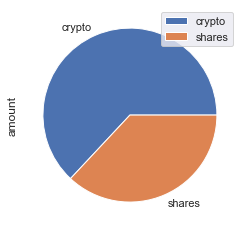

In [20]:
# Plot savings pie chart
share_pie = df_savings.plot.pie(y='amount')

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You are reaching this financial goal.')
else:
    print('You should save more. Try to avoid buying latte.')
    

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [28]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_stock_data.head()

/opt/miniconda3/envs/alpacaenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead
  


AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-10 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410  45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030  35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245  42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100  37206183.0

In [52]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_years = 30
num_trading_days = 252


MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = num_trading_days * num_years
)

In [53]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2020-05-01 00:00:00-04:00  116.97  117.0998  116.6775  116.900  11778582   
2020-05-04 00:00:00-04:00  116.89  117.0900  116.8700  116.975   6950122   
2020-05-05 00:00:00-04:00  116.96  116.9700  116.8100  116.880   7315932   
2020-05-06 00:00:00-04:00  116.44  116.7100  116.3000  116.450   9313368   
2020-05-07 00:00:00-04:00  116.61  116.7600  116.4200  116.730   7338194   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-05-01 00:00:00-04:00          NaN  285.31  290.6572  281.52  282.73   
2020-05-04 00:00:00-04:00     0.000642  280.74  283.9000  279.13  283.66   
2020-05-05 00:00:00-04:00    -0.000812  286.64  289.2500  285.75  286.22   
2020-05-06 00:00:00-04:00    -0.003679  288.04  288.4600  283.78  284.29   
2020-05-07 00:00:00-04:00     0.002404  287.75  289.7800  287.13  287.70   

                                                   
                              volume daily_return  
time                                               
2020-05-01 00:00:00-04:00  111321036          NaN  
2020-05-04 00:00:00-04:00   70199660     0.003289  
2020-05-05 00:00:00-04:00   72232658     0.009025  
2020-05-06 00:00:00-04:00   65371977    -0.006743  
2020-05-07 00:00:00-04:00   68883538     0.011995

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-10 00:00:00-04:00  108.60  108.660  108.4400  108.520  1427511.0   
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-10 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-05-11 00:00:00-04:00    -0.000046  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   

                                                    
                               volume daily_return  
time                                                
2017-05-10 00:00:00-04:00         NaN          NaN  
2017-05-11 00:00:00-04:00  45435690.0          NaN  
2017-05-12 00:00:00-04:00  35283567.0    -0.001587  
2017-05-15 00:00:00-04:00  42230620.0     0.005083  
2017-05-16 00:00:00-04:00  37206183.0    -0.000604

In [54]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alba/Documents/FinTech/python-homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011051,0.998943,1.006109,1.005824,1.006841,0.994832,0.996965,1.006741,0.995579,0.993193,...,1.000574,1.000354,1.000066,1.006210,0.994999,0.998558,1.006960,1.000311,1.004402,0.996629
2,1.010807,1.001384,1.004252,1.004818,1.004235,0.994771,0.997611,1.003288,1.003992,0.995093,...,0.997100,1.003606,1.007879,1.010429,0.995801,1.006634,1.008075,0.994957,1.009524,1.001866
3,1.009383,1.014445,1.005135,1.008439,1.007013,0.996791,0.999845,0.998501,1.005862,0.993147,...,0.994223,1.004554,1.011302,1.009003,0.989214,1.012002,1.005916,1.005784,1.008968,0.999281
4,1.001953,1.012414,0.999336,1.006805,1.003118,1.008497,1.000928,0.998148,1.003302,0.992191,...,0.996595,1.002492,1.010172,1.009833,0.989455,1.008452,1.008654,1.012148,1.018241,1.004313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,170.820154,120.305126,70.488859,43.765501,68.406394,234.938689,53.899259,58.199426,133.330479,75.033914,...,168.775358,100.831542,110.308001,78.127183,90.524177,94.218849,94.385429,64.632980,107.495477,132.848246
7557,170.298736,120.233682,71.005514,43.291813,68.506305,237.174109,53.771526,57.858299,133.275843,74.720305,...,169.265144,100.312643,110.014456,78.208449,90.719307,93.802486,94.456795,64.513842,107.855811,133.126473
7558,169.667272,120.104075,71.386069,43.665293,69.420143,238.514483,53.699847,58.026475,133.286657,75.154265,...,170.089001,99.715207,110.466648,78.598425,90.690878,93.846398,95.085392,64.452431,108.791635,132.727722
7559,169.755499,120.873994,71.472977,44.050664,69.316157,239.286245,53.863878,57.811648,133.044658,74.975839,...,169.745625,99.494388,111.070861,78.681360,91.173375,93.634224,94.355391,64.451989,109.124916,133.542635


In [55]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

In [56]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [57]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             92.994201
std              39.334165
min              26.040024
25%              66.728852
50%              84.444409
75%             110.303675
max             308.930714
95% CI Lower     36.374389
95% CI Upper    192.367819
Name: 7560, dtype: float64


count           500.000000
mean             22.130012
std              16.088798
min               2.342293
25%              10.465170
50%              17.476764
75%              29.550007
max             104.663919
95% CI Lower      4.779747
95% CI Upper     64.053604
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [58]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $727487.78 and $3847356.39


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $95594.94 and $1281072.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1091231.68 and $5771034.58


There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $143392.41 and $1921608.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [77]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
early_retirement = 5

MC_dist_five = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = num_trading_days * early_retirement
)

In [78]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alba/Documents/FinTech/python-homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005067,0.990261,1.002616,1.004018,1.011743,0.987845,1.015094,1.001376,0.995847,0.998675,...,1.003487,0.993150,1.013649,1.009431,1.005100,0.989624,0.994244,1.001420,1.001402,0.999258
2,1.001551,0.991525,1.005827,1.004056,1.009766,0.991468,1.005175,0.982801,1.018943,1.001621,...,0.991249,0.981952,1.019833,1.011043,1.012152,0.986770,0.992190,1.001243,1.006968,0.999727
3,0.990438,0.993339,1.000195,1.007594,1.009315,0.992079,1.016720,0.982646,1.022542,1.003204,...,0.992248,0.974951,1.026728,1.006688,1.023448,0.986639,0.998222,1.009438,1.011795,0.999977
4,0.988206,0.984288,1.006504,1.018143,1.011544,0.990712,1.020494,0.985955,1.008646,1.002252,...,0.985538,0.987331,1.010544,0.989409,1.036110,0.994352,0.985692,1.002021,1.026637,0.995971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6.417175,4.917023,5.595608,3.429021,4.146453,3.824740,5.516550,9.877095,4.272535,10.272219,...,4.366004,3.296673,4.503426,5.315109,4.450347,3.212429,4.061696,4.737524,4.023040,5.447490
1257,6.475816,4.953954,5.644181,3.413489,4.136718,3.832344,5.576669,9.994682,4.214548,10.164226,...,4.420056,3.289685,4.455239,5.304037,4.470256,3.188564,4.063034,4.721698,4.030732,5.453000
1258,6.479218,4.964811,5.691507,3.401122,4.102085,3.883194,5.455346,9.986654,4.210542,10.287681,...,4.450745,3.281166,4.443649,5.311765,4.463395,3.167794,3.988207,4.705982,4.041072,5.512146
1259,6.485648,5.048575,5.691385,3.373267,4.090814,3.870644,5.461177,10.058131,4.200331,10.268797,...,4.429412,3.283933,4.468403,5.386554,4.505664,3.186254,4.013534,4.749809,4.089453,5.553157


In [67]:
# Plot simulation outcomes
line_plot_five = MC_dist_five.plot_simulation()

In [68]:
# Plot probability distribution and confidence intervals
dist_plot_early = MC_dist_five.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_dist_five.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              4.926926
std               1.549067
min               2.134318
25%               3.767434
50%               4.696313
75%               5.847987
max              15.079861
95% CI Lower      2.704669
95% CI Upper      8.465973
Name: 1260, dtype: float64


count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [81]:
# Set initial investment
initial_investment_five = 400000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $400000 in the portfolio over the next 5 years will end within in the range of $1081867.44 and $3386389.32


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
moderate_retirement = 10

MC_dist_ten = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.05,.95],
    num_simulation = 500,
    num_trading_days = num_trading_days * moderate_retirement
)

In [91]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alba/Documents/FinTech/python-homework/05-APIs/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982119,1.014222,0.994186,1.011747,1.003880,1.012077,1.012479,1.012967,0.993515,0.996386,...,1.007636,1.007411,0.998595,1.005791,1.013967,1.011438,1.019193,1.005533,0.993809,1.005504
2,0.970876,1.022163,0.990497,1.022086,1.011925,1.008539,1.012116,1.007648,0.993459,0.996584,...,1.009480,1.013316,0.980225,0.996116,1.008213,1.018752,1.033665,1.023294,1.004151,1.019908
3,0.987494,1.023218,0.998959,1.023667,1.005075,1.014453,1.007031,1.021310,1.004533,0.996039,...,0.997391,1.007443,0.986136,1.000747,1.005438,1.020763,1.001379,1.022210,1.007942,1.023435
4,1.017688,1.011591,0.998452,1.011188,1.011328,1.014486,0.991770,1.046907,1.002366,0.986422,...,0.998532,1.025347,0.983269,1.016655,1.021237,1.043407,0.981337,1.035555,0.991878,1.016389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,59.141407,32.272302,37.871197,24.019718,58.084979,50.393479,74.041670,37.459560,21.870861,30.926801,...,28.856413,126.577018,19.355829,18.313918,37.252024,48.276364,37.054696,73.382070,28.534224,52.154484
2517,59.367405,32.688896,37.063921,24.088128,58.295822,50.107307,74.103009,37.728706,21.888661,31.174651,...,28.606015,127.172835,19.856444,18.140777,37.277226,48.409279,36.399976,72.295058,29.086550,53.205598
2518,60.042908,33.007377,36.798628,24.312452,58.425027,49.644864,73.999025,37.911285,21.731547,31.850170,...,28.115733,125.266637,19.718275,18.213655,37.060504,48.827103,36.101912,71.712523,29.244113,53.279195
2519,59.619791,32.954144,37.019353,24.311167,58.659465,50.257606,74.363347,37.503479,21.699528,31.466434,...,28.167511,125.628260,19.976324,18.314804,37.666272,48.692889,36.450187,71.281429,29.224770,53.431890


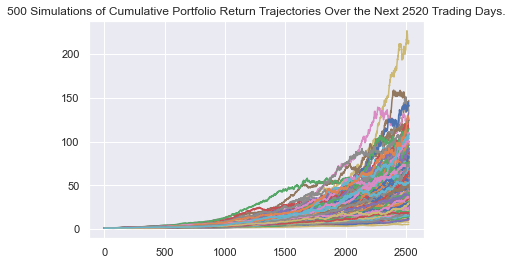

In [92]:
# Plot simulation outcomes
line_plot_ten = MC_dist_ten.plot_simulation()

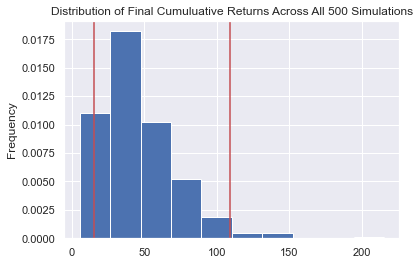

In [93]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_dist_ten.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean             46.092272
std              25.946235
min               5.431393
25%              27.441688
50%              40.139092
75%              59.852958
max             215.294523
95% CI Lower     15.055510
95% CI Upper    108.926612
Name: 2520, dtype: float64


count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [97]:
# Set initial investment
initial_investment_ten = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $752775.51 and $5446330.61


There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12


# Conclusion
I made two plans 5-year and 10-year plans. They give approximately the same return as a 30-year long plan. The main difference between plans is: the 5-year plan is riskier and requires a large initial investment and is riskier than the 30-year plan. A 10-year plan requires a moderate initial investment but it is very risky.